In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [ ]:
# Загружаем датасет
data = pd.read_csv('csgo_round_snapshots.csv')
data

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="round_winner", data=data)
ax.set(title='Round winners on each map')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="map", hue="bomb_planted", data=df)
ax.set(title='Maps and bomb planted')
plt.show()

NameError: ignored

<Figure size 800x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x=df['round_winner'].unique(), y=df['round_winner'].value_counts())
ax.set(title='Total wins per side', xlabel='Side', ylabel='Wins')
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.distplot(df['ct_health'], bins=10, ax=ax1);
sns.distplot(df['t_health'], bins=10, ax=ax2);

In [ ]:
# Plot the distribution of money
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.distplot(df['ct_money'], bins=10, ax=ax1);
sns.distplot(df['t_money'], bins=10, ax=ax2

In [ ]:
# Plot the distribution of scores
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
sns.kdeplot(df['ct_score'], shade=True, ax=ax1)
sns.kdeplot(df['t_score'], shade=True, ax=ax2)

In [ ]:
# Описание датасета
print(data.info())

In [ ]:
print(data.describe())

In [ ]:
# Смотрим, какие значения имеются в столбцах
for col_name in data.columns:
    # Do something with the column data
    print(f"Column Name: {col_name}")
    print(data[col_name].value_counts())
    print("-----------------")

In [ ]:
# Количество уникальных значений в столбцах
for col_name in data.columns:
    # Do something with the column data
    print(f"Column Name: {col_name}")
    print(data[col_name].nunique())
    print("-----------------")

In [ ]:
# Провека на пустые значения

for col_name in data.columns:
    # Do something with the column data
    print(f"Column Name: {col_name}")
    print(data[col_name].isnull().sum(), data[col_name].dtype)
    print("-----------------")

In [ ]:
data_list = ["t_grenade_smokegrenade", "ct_grenade_smokegrenade","t_grenade_flashbang","ct_grenade_flashbang", "ct_weapon_usps", "t_weapon_glock", "t_weapon_cz75auto", "t_players_alive"]
for col_name in data_list:
  sns.boxplot(data[col_name])
  plt.show()

In [ ]:
data_list = ["t_grenade_smokegrenade", "ct_grenade_smokegrenade","t_grenade_flashbang","ct_grenade_flashbang", "ct_weapon_usps", "t_weapon_glock", "t_weapon_cz75auto", "t_players_alive"]
for col_name in data_list:
  data = data[(data[col_name] < 6)]

In [ ]:
# Смотрим, какие значения имеются в столбцах
for col_name in data.columns:
    # Do something with the column data
    print(f"Column Name: {col_name}")
    print(data[col_name].value_counts())
    print("-----------------")

In [ ]:
data = pd.get_dummies(data = data, columns=["map","bomb_planted"])
encoder = LabelEncoder()
data["round_winner"] = encoder.fit_transform(data["round_winner"])
data

In [ ]:
def test_accuracy_LinearRegression(data):
    x = data.drop('round_winner', axis = 1)
    y = data['round_winner']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = True)
    x_train = MinMaxScaler().fit_transform(x_train)
    x_test = MinMaxScaler().fit_transform(x_test)

    best_accuracy = 0
    best_C = None

    for i in range(5,25):
        logistic_regression = LogisticRegression(max_iter=100000, C=i)
        logistic_regression.fit(x_train, y_train)
        y_pred = logistic_regression.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Точность с гиперпараметром: ", accuracy,"С =",i)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = i

    print("Лучшее C:", best_C, "с точностью:", best_accuracy)



    logistic_regression = LogisticRegression(max_iter=100000, C = best_C)

    scores = cross_val_score(logistic_regression, x_train, y_train, cv=5)
    print("Средняя достоверность кросс-валидации: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    logistic_regression.fit(x_train, y_train)

    y_pred = logistic_regression.predict(x_test)

   #Метрика достоверности предсказания:
    print(f"Метрика достоверности предсказания: {metrics.accuracy_score(y_test, y_pred)}")
    #Метрика точности:
    print(f"Метрика точности: {metrics.precision_score(y_test, y_pred, pos_label=1)}")
    #Метрика полноты:
    print(f"Метрика полноты: {metrics.recall_score(y_test, y_pred,  pos_label=1)}")

    %matplotlib inline
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)
    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')

In [ ]:
def test_accuracy_DecisionTreeClassifier(data):
    x = data.drop('round_winner', axis = 1)
    y = data['round_winner']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = True)
    x_train = MinMaxScaler().fit_transform(x_train)
    x_test = MinMaxScaler().fit_transform(x_test)

    best_accuracy = 0
    best_min_samples_split = None

    for i in range(2,20):
        clf = DecisionTreeClassifier(min_samples_split=i)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Точность с гиперпараметром: ", accuracy,"min_samples_split =",i)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_min_samples_split = i

    print("Лучшее min_samples_split:", best_min_samples_split, "с точностью:", best_accuracy)



    clf = DecisionTreeClassifier( min_samples_split = best_min_samples_split)

    scores = cross_val_score(clf, x_train, y_train, cv=5)
    print("Средняя достоверность кросс-валидации: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

   #Метрика достоверности предсказания:
    print(f"Метрика достоверности предсказания: {metrics.accuracy_score(y_test, y_pred)}")
    #Метрика точности:
    print(f"Метрика точности: {metrics.precision_score(y_test, y_pred, pos_label=1)}")
    #Метрика полноты:
    print(f"Метрика полноты: {metrics.recall_score(y_test, y_pred,  pos_label=1)}")

    %matplotlib inline
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)
    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')

In [ ]:
def test_accuracy_RandomForestClassifier(data):
    x = data.drop('round_winner', axis = 1)
    y = data['round_winner']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = True)
    x_train = MinMaxScaler().fit_transform(x_train)
    x_test = MinMaxScaler().fit_transform(x_test)

    best_accuracy = 0
    best_random_state = None

    for i in range(10,60):
        clf = RandomForestClassifier(random_state=i)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Точность с гиперпараметром: ", accuracy,"random_state =",i)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_random_state = i

    print("Лучшее random_state:", best_random_state, "с точностью:", best_accuracy)



    clf = RandomForestClassifier( random_state = best_random_state)

    scores = cross_val_score(clf, x_train, y_train, cv=5)
    print("Средняя достоверность кросс-валидации: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    clf.fit(x_train, y_train)

    y_pred = clf.predict(x_test)

   #Метрика достоверности предсказания:
    print(f"Метрика достоверности предсказания: {metrics.accuracy_score(y_test, y_pred)}")
    #Метрика точности:
    print(f"Метрика точности: {metrics.precision_score(y_test, y_pred, pos_label=1)}")
    #Метрика полноты:
    print(f"Метрика полноты: {metrics.recall_score(y_test, y_pred,  pos_label=1)}")

    %matplotlib inline
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)
    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')

In [ ]:
def test_accuracy_GradientBoostingClassifier(data):
    x = data.drop('round_winner', axis = 1)
    y = data['round_winner']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = True)
    x_train = MinMaxScaler().fit_transform(x_train)
    x_test = MinMaxScaler().fit_transform(x_test)

    best_accuracy = 0
    best_max_depth = None

    for i in range(13,21):
        lin_reg = GradientBoostingClassifier(max_depth=i)
        lin_reg.fit(x_train, y_train)
        y_pred = lin_reg.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Точность с гиперпараметром: ", accuracy," max_depth =",i)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_max_depth = i

    print("Лучшее max_depth:", best_max_depth, "Лучшее " "с точностью:", best_accuracy)



    lin_reg = GradientBoostingClassifier( n_estimators = 40, max_depth=best_max_depth) #логистическая регрессия (ВЫБИРАЕМ САМИ ПОД КАЖДЫЙ ДАТАСЕТ СВОЙ ЛУЧШЕ ПОДОЙДЕТ)

    scores = cross_val_score(lin_reg, x_train, y_train, cv=5) #кросс-валидация с 5 фолдами
    print("Средняя достоверность кросс-валидации: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    lin_reg.fit(x_train, y_train)

    y_pred = lin_reg.predict(x_test)

   #Метрика достоверности предсказания:
    print(f"Метрика достоверности предсказания: {metrics.accuracy_score(y_test, y_pred)}")
    #Метрика точности:
    print(f"Метрика точности: {metrics.precision_score(y_test, y_pred, pos_label=1)}")
    #Метрика полноты:
    print(f"Метрика полноты: {metrics.recall_score(y_test, y_pred,  pos_label=1)}")

    %matplotlib inline
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)
    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')

In [ ]:
test_accuracy_LinearRegression(data)

In [ ]:
test_accuracy_DecisionTreeClassifier(data)

Точность с гиперпараметром:  0.8811971969349662 random_state = 10
Точность с гиперпараметром:  0.8801493221560024 random_state = 11
Точность с гиперпараметром:  0.8824415482349859 random_state = 12
Точность с гиперпараметром:  0.8823105638876154 random_state = 13
Точность с гиперпараметром:  0.8802148143296876 random_state = 14
Точность с гиперпараметром:  0.8827035169297269 random_state = 15
Точность с гиперпараметром:  0.881393673456022 random_state = 16
Точность с гиперпараметром:  0.8800183378086319 random_state = 17
Точность с гиперпараметром:  0.8829654856244679 random_state = 18
Точность с гиперпараметром:  0.8808042438928548 random_state = 19
Точность с гиперпараметром:  0.8821140873665597 random_state = 20
Точность с гиперпараметром:  0.8825725325823565 random_state = 21
Точность с гиперпараметром:  0.8831619621455236 random_state = 22
Точность с гиперпараметром:  0.8844063134455432 random_state = 23
Точность с гиперпараметром:  0.8802148143296876 random_state = 24
Точность с 

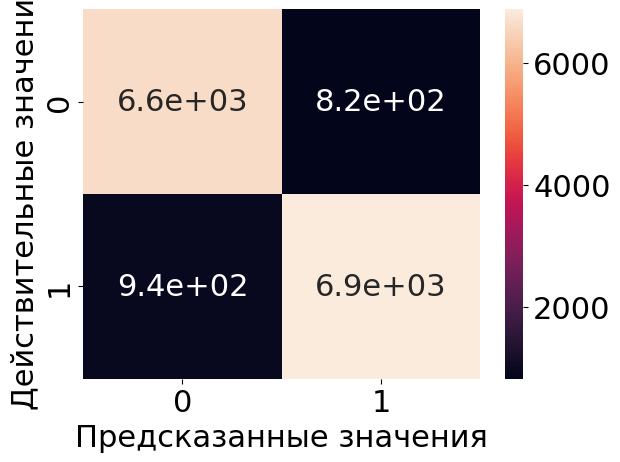

In [ ]:
test_accuracy_RandomForestClassifier(data)

In [ ]:
test_accuracy_GradientBoostingClassifier(data)